# Neutrino underwater acoustic propagation modeling at Tanganyika

In [15]:
from math import *
import math
import matplotlib.pyplot as plt
import arlpy.uwapm as pm
import numpy as np
import bokeh

In [16]:
# put in neutrino energy in GeV
neutrino_energy = [1e11, 1e12, 1e13, 1e14, 1e15]

# Which neutrino do you want to plot
n = 2

# put in detection threshold in micropascal
detection_threshold = 5000

# define the frequency of the signal you want to research
freq = 10000

# define the loudness of the wind noise in the frequency that you are trying to detect in dB for sea state 0, 1, 2, 3, 4
noise = [23.631547596452776, 33.11838057695792, 37.460864282392095, 41.22060669579062, 44.8447510320492]

# 10 kHz from other Jupyter Notebook SS 0, 1, 3, 6
noise = [29.318666428048786, 38.80549940855393, 46.907725527386646, 57.28069425150966]

# p. 22 of https://inspirehep.net/files/2503aef6f043cd5fd73d7a3963167070 for sea state 0, 1, 3, 6
noise1 = [15.847833789965078, 24.60897842756548, 34.32006687269598, 42.00741090235126]

In [17]:
# a formula that calculates amplitude based on perkin
def get_amplitude(neutrino_energy):
    """
    Generates the maximum amplitude in Pa of a neutrino with E = neutrino_energy at a distance of 1km from the source.
    """    
    # define the Bjorken-y variable
    y = 0.25
    
    # define the translation factor following Perkin (J. Perkin, ‘The acoustic detection of ultra high energy neutrinos,’ Ph.D. dissertation, TheUniversity of Sheffield, Jan. 2008)
    kv = 21.15 * 10**(-12)

    
    # calculate the corresponding amplitude of the original signal in Pa at 1km distance from the neutrino axis
    amplitude = y * kv * neutrino_energy
    
    return amplitude

dB_energies = []

for i in range(0, len(neutrino_energy)):
    energy = neutrino_energy[i]
    p_norm_1km = get_amplitude(energy)   
    # transform the 1km amplitude to the original amplitude by using the graph in the original notebook (Neutrino Signal)
    p_norm = p_norm_1km * (10 / 4) 

    print(f'The amplitude of the signal is {round(p_norm_1km, 4)} Pa at 1 km distance.')
    print(f'The amplitude of the signal at the source is approximately {round(p_norm, 4)} Pa.')

    # define the original signal amplitude in dB re uPa
    dB_1km = 20 * np.log10(p_norm_1km * 1e6)
    dB = 20 * np.log10(p_norm * 1e6)
    dB_energies.append(dB)
    
    dB_threshold = 20 * np.log10(detection_threshold)
    
    print(f'The amplitude of the signal is {round(dB_1km, 4)} dB re 1 uPa at 1 km distance.')
    print(f'The amplitude of the signal at the source is approximately {round(dB, 4)} dB re 1 uPa.')
    print(f'The amplitude of the signal that is still detectable is around {round(dB_threshold, 4)} dB re 1 uPa.')
    print('--------------------------------------------------------------------------------------------------------')

The amplitude of the signal is 0.5287 Pa at 1 km distance.
The amplitude of the signal at the source is approximately 1.3219 Pa.
The amplitude of the signal is 114.465 dB re 1 uPa at 1 km distance.
The amplitude of the signal at the source is approximately 122.4238 dB re 1 uPa.
The amplitude of the signal that is still detectable is around 73.9794 dB re 1 uPa.
--------------------------------------------------------------------------------------------------------
The amplitude of the signal is 5.2875 Pa at 1 km distance.
The amplitude of the signal at the source is approximately 13.2188 Pa.
The amplitude of the signal is 134.465 dB re 1 uPa at 1 km distance.
The amplitude of the signal at the source is approximately 142.4238 dB re 1 uPa.
The amplitude of the signal that is still detectable is around 73.9794 dB re 1 uPa.
--------------------------------------------------------------------------------------------------------
The amplitude of the signal is 52.875 Pa at 1 km distance.
The 

In [18]:
print(dB_energies)

[122.42380778110272, 142.4238077811027, 162.42380778110274, 182.42380778110274, 202.42380778110274]


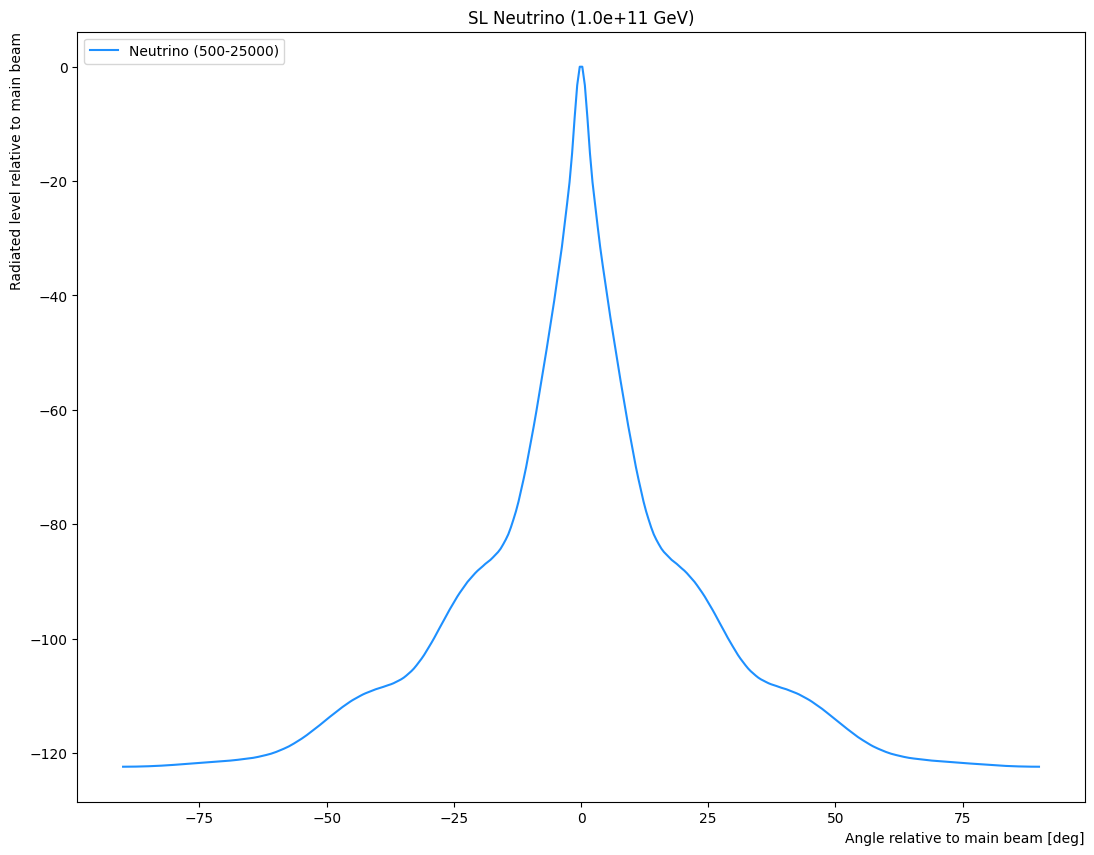

<Figure size 640x480 with 0 Axes>

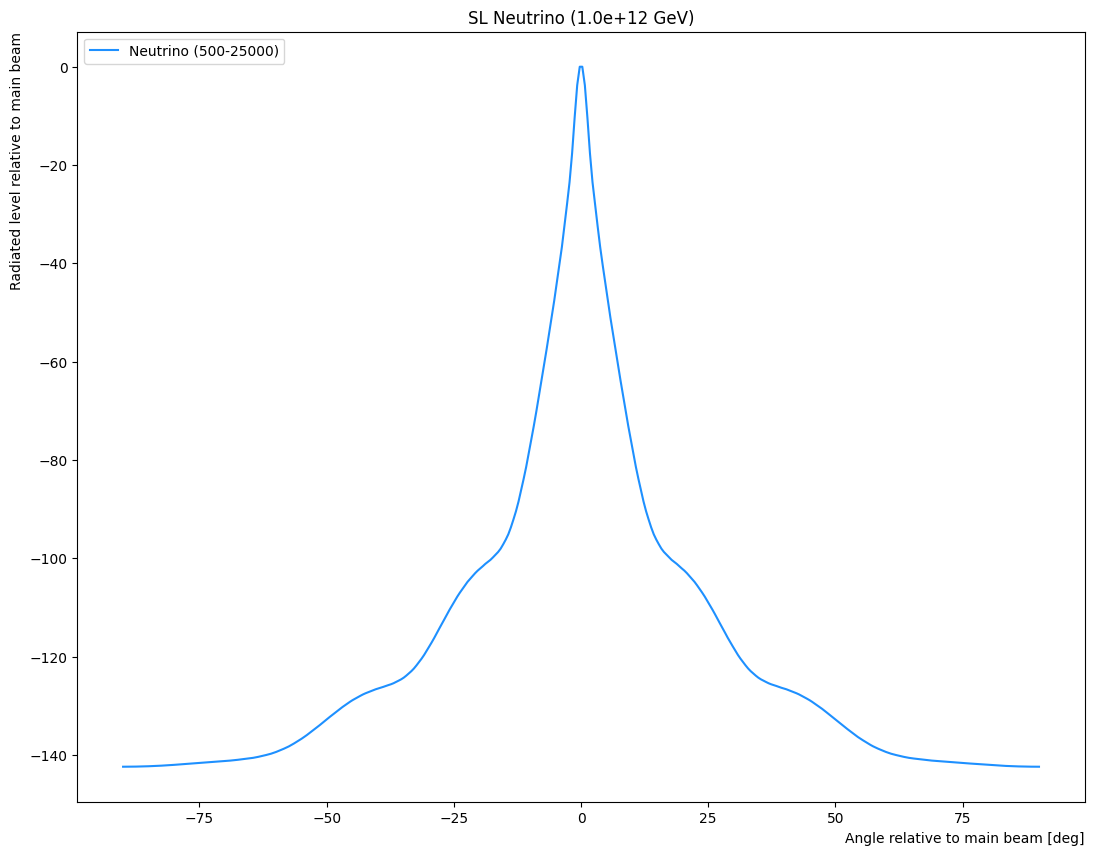

<Figure size 640x480 with 0 Axes>

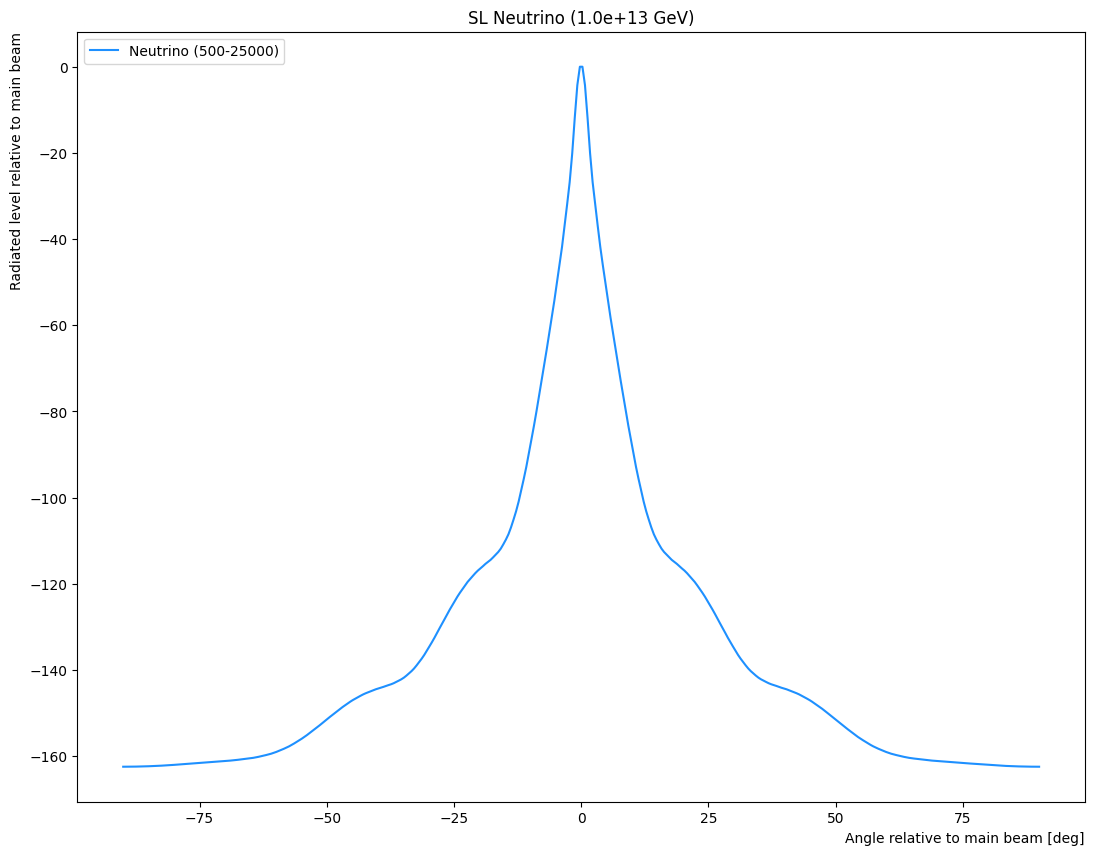

<Figure size 640x480 with 0 Axes>

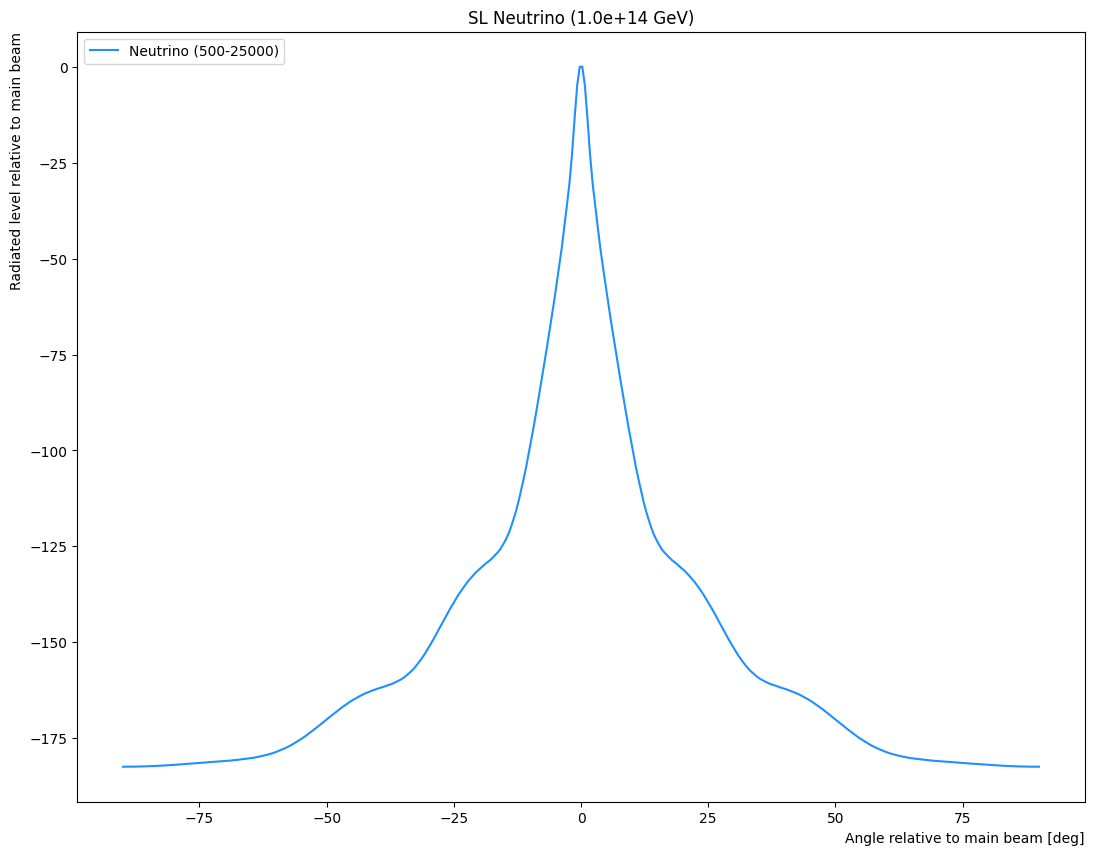

<Figure size 640x480 with 0 Axes>

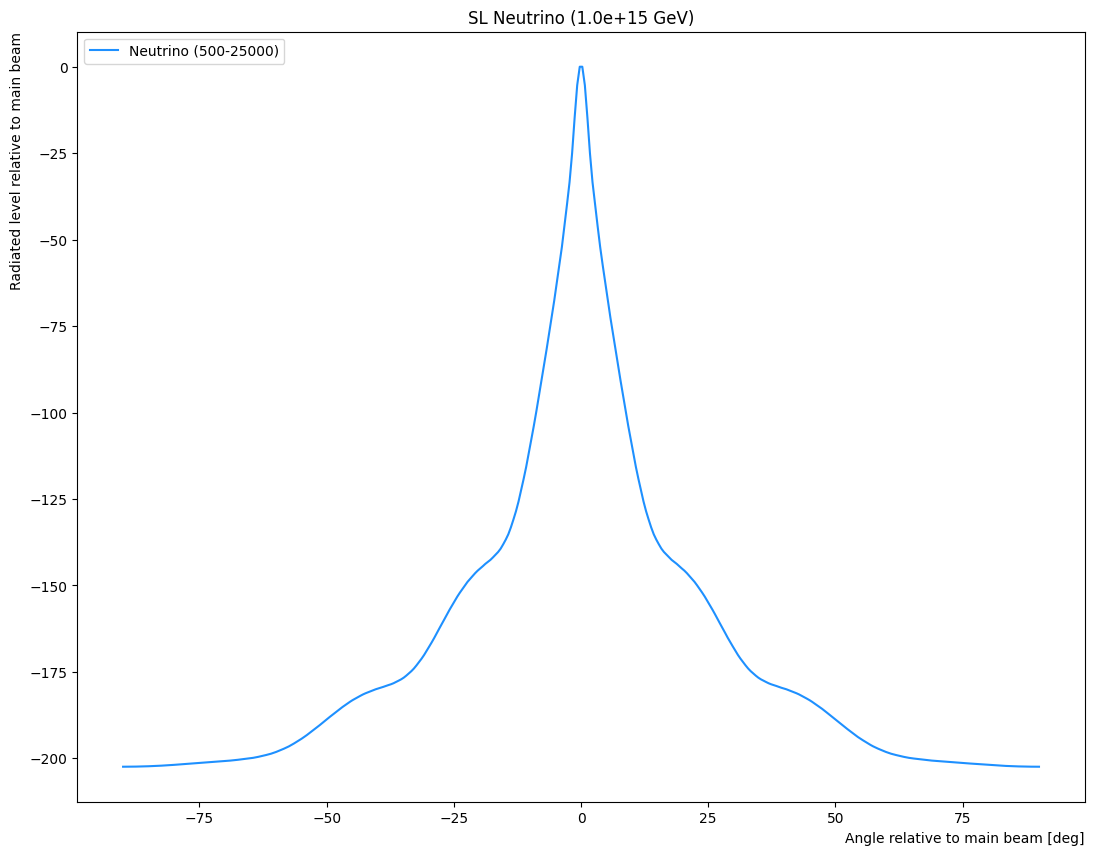

<Figure size 640x480 with 0 Axes>

In [19]:
def sound_level_Neutrino():
    """
    Generates the sound level (SL) distribution over angle for a neutrino
    """
    ###########################################################################################################################
    # set up the conditions to calculate sound level for the sperm whale and neutrino 
    ###########################################################################################################################        
    # angle w.r.t. axis of click [rad]
    thetas = np.linspace(-90, 90, 360)
    SL_thetas = []

    ###########################################################################################################################
    # Calculate the sound level for the neutrino in a similar manner
    ########################################################################################################################### 
    
    # Generate an array of frequencies from 5000 to 50000
    f_arr = np.linspace(5000, 50000, 100) # 500 - 25000
    #f_arr = freqs[1:]
    #f_arr = np.linspace(freqs[1], freqs[len(freqs) - 1], 100)
    I_theta = np.zeros(len(thetas))

    # Loop over the frequencies and calculate the intensity of the neutrino at different angles
    for freq in f_arr:
        I_theta += np.asarray(list(map(correct_offaxis_neutrino, np.radians(thetas), [freq]*len(thetas))))

    # calculate the average intensity of the signal over different frequencies
    I_theta_mean = np.asarray(I_theta) / len(f_arr)
    
    # get the sound level relative to the original neutrino sound in log scale
    SL_thetas = [10*math.log10(x) for x in I_theta_mean]
    
    # from all the values in the list substract the maximum values such that all identities are negative and 0 is the maximum
    SL_thetas -= np.max(SL_thetas)      
    
    return SL_thetas, I_theta

def correct_offaxis_neutrino(theta, freq):
    # distance from the source to the detector, assumed to be 1 unit
    d = 1
    
    c_s = 1497
    
    # wavelength of the underwater signal which is speed of sound divided by the frequency
    wl = c_s/freq
    
    # initial intensity of the signal (assumed to be 1 unit)
    I_0 = 1
    
    # below the formula to find the intensity of a signal under different angles is used
    if theta == 0:
        return I_0
    else:
        return I_0 * pow(np.sin((np.pi*d/wl)*np.sin(theta))/((np.pi*d/wl)*np.sin(theta)), 2)


# extract the sound level values from the function
SL_Neutrino, I_theta = sound_level_Neutrino()

# use the same thetas as above
thetas = np.linspace(-90, 90, 360)

beampatterns = []

for i in range(0, len(dB_energies)):
    dB = dB_energies[i]
    # normalise the values of the sound level and use this normalisation to get an accurate SL_array
    SL_Neutrino_normalised = (SL_Neutrino - min(SL_Neutrino)) / (max(SL_Neutrino - min(SL_Neutrino)))
    SL_Neutrino_prepped = (SL_Neutrino_normalised * dB) - np.max(dB)
    
    # plot the absolute graph
    plt.figure(figsize=(13, 10))
    plt.title(f'SL Neutrino ({neutrino_energy[i]:.1e} GeV)')
    plt.plot(thetas, SL_Neutrino_prepped, '-', label = 'Neutrino (500-25000)', color= 'dodgerblue')
    #plt.plot(thetas, SL_Neutrino_sharp, '-', label = 'Neutrino (freqs)', color= 'gold')
    plt.legend(loc=2)
    plt.xlabel("Angle relative to main beam [deg]", ha ='right', x=1.0)
    plt.ylabel("Radiated level relative to main beam",   ha ='right', position=(0,1))
    
    plt.show()
    plt.clf()
    
    # beam pattern
    beampattern = np.column_stack((thetas[1:-1], SL_Neutrino_prepped[1:-1]))
    beampatterns.append(beampattern)

# Sound Speed Profile of Tanganyika 

In [20]:
import arlpy.plot as plt

env = pm.create_env2d()

# include the sound speed profile of Tanganyika
ssp = [
    [   0, 1503.89725749], 
    [   5, 1503.53512228],
    [  27, 1503.40633872],
    [  45, 1501.17598527],
    [  63, 1497.95739375],
    [  91, 1496.57667752],
    [ 120, 1496.18094787],
    [ 144, 1496.13991023],
    [ 168, 1496.23668012],
    [ 187, 1496.33233254],
    [ 216, 1496.82067334],
    [ 250, 1497.30878916],
    [ 300, 1497.98142059],
    [ 350, 1498.79460352],
    [ 400, 1499.46622159], 
    [ 450, 1500.36382161],
    [ 625, 1503.19287932],
    [ 721, 1504.83479986], 
    [ 818, 1506.35078556],
    [ 867, 1507.14541936],
    [1500, 1517.77346984]]   

envs = []

for i in range(0, len(neutrino_energy)):
    # create the 2D environment with the beampattern as the input
    env = pm.create_env2d(frequency=freq, min_angle=-89, max_angle=89, depth=1500, tx_depth=1100, tx_directionality=beampatterns[i], rx_depth=[525, 1425, 1350, 1275, 1200, 1125, 1050, 975, 900, 825, 750, 675, 600], rx_range=30000, soundspeed=ssp, nbeams=1000)
    envs.append(env)

# plot the sound speed profile
pm.plot_ssp(envs[1], width=500)
pm.print_env(envs[1])

                name : arlpy
   bottom_absorption : 0.1
      bottom_density : 1600
    bottom_roughness : 0
   bottom_soundspeed : 1600
               depth : 1500
        depth_interp : linear
           frequency : 10000
           max_angle : 89
           min_angle : -89
              nbeams : 1000
            rx_depth : [ 525. 1425. 1350. 1275. 1200. 1125. 1050.  975.  900.  825.  750.  675.
                         600.]
            rx_range : 30000
          soundspeed : [[   0.         1503.89725749]
                        [   5.         1503.53512228]
                        [  27.         1503.40633872]
                        [  45.         1501.17598527]
                        [  63.         1497.95739375]
                        [  91.         1496.57667752]
                        [ 120.         1496.18094787]
                        [ 144.         1496.13991023]
                        [ 168.         1496.23668012]
                        [ 187.         1496.33233254]

In [21]:
pm.models()

['bellhop']

# Plotting an Environment

In [22]:
# Plotting an Environment using ARLPY
pm.plot_env(envs[1], surface_color='dodgerblue', bottom_color='peru', rx_color='blue', rx_plot=None, width=900)

rays = pm.compute_rays(env)

pm.plot_rays(rays, env=env, width=900)

# Calculate Transmission Loss

In [34]:
# make the grid over which to calculate the tranmission loss
dis = np.linspace(0, 30000, 300)
el = np.linspace(0, 1500, 300) 
tx_depth = 1300

grid = np.zeros((len(dis), len(el)))
departure = np.zeros((len(dis), len(el)))
bounces = np.zeros((len(dis), len(el)))

for i in range(0, len(dis)):
    print(f"{i}/{len(dis)}")
    for j in range(0, len(el)):
        distance = dis[i]
        elevation = el[j]

        env = pm.create_env2d(frequency=freq, min_angle=-89, max_angle=89, depth=1500, tx_depth=tx_depth, tx_directionality=beampatterns[n], rx_depth=elevation, rx_range=distance, soundspeed=ssp, nbeams=10000)

        try:
            eigenrays = pm.compute_eigenrays(env)
            distance_list = []
            
            # calculate the +/- distance a ray has traveled
            for _, ray in eigenrays.iterrows():
                ray_points = np.array(ray['ray'])
    
                # Calculate the distance between consecutive points
                distances = np.sqrt(np.sum(np.diff(ray_points, axis=0)**2, axis=1))
                
                # Add up the distances to calculate the total traveled distance
                total_distance = np.sum(distances)
                distance_list.append(total_distance)
            
            # append the ray that has traveled least to the array of distances 
            grid[i, j] = np.min(distance_list)

            # find the matching angle of departure
            min_index = np.argmin(distance_list)
            departure[i, j] = eigenrays['angle_of_departure'].iloc[min_index]       
            bounces[i, j] = eigenrays['surface_bounces'].iloc[min_index] 
        
        except:  
            eigenrays = None

0/300
1/300
2/300
3/300
4/300
5/300
6/300
7/300
8/300
9/300
10/300
11/300
12/300
13/300
14/300
15/300
16/300
17/300
18/300
19/300
20/300
21/300
22/300
23/300
24/300
25/300
26/300
27/300
28/300
29/300
30/300
31/300
32/300
33/300
34/300
35/300
36/300
37/300
38/300
39/300
40/300
41/300
42/300
43/300
44/300
45/300
46/300
47/300
48/300
49/300
50/300
51/300
52/300
53/300
54/300
55/300
56/300
57/300
58/300
59/300
60/300
61/300
62/300
63/300
64/300
65/300
66/300
67/300
68/300
69/300
70/300
71/300
72/300
73/300
74/300
75/300
76/300
77/300
78/300
79/300
80/300
81/300
82/300
83/300
84/300
85/300
86/300
87/300
88/300
89/300
90/300
91/300
92/300
93/300
94/300
95/300
96/300
97/300
98/300
99/300
100/300
101/300
102/300
103/300
104/300
105/300
106/300
107/300
108/300
109/300
110/300
111/300
112/300
113/300
114/300
115/300
116/300
117/300
118/300
119/300
120/300
121/300
122/300
123/300
124/300
125/300
126/300
127/300
128/300
129/300
130/300
131/300
132/300
133/300
134/300
135/300
136/300
137/300
138/30

In [43]:
print(bounces)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
# Tanganyika water parameters
F = 10000
T = 23.07
D = tx_depth
S = 0.61
pH = 8.3

In [36]:
def alpha_Ainslie(F, T, D, S, pH):
    """
    Computes the absorption coefficient in dB/km by inputting:
    - frequency (f) in kHz
    - temperature (T) in degrees Celsius
    - depth (D) in km
    - salinity (S) in ppt
    """
    
    # transform frequency into kHz
    f = F / 1000
    D = D / 1000
    
    F1 = 0.78 * (S / 35)**(1/2) * np.exp(T / 26)
    F2 = 42 * np.exp(T / 17)

    alpha_Ainslie = 0.106 * F1 * f**2 / (F1**2 + f**2) * np.exp((pH - 8) / 0.56) + 0.52 * (1 + (T / 43)) * (S/35) * F2 * f**2 / (F2**2 + f**2) * np.exp(-D / 6) + 0.00049 * f**2 * np.exp(-((T / 27) + (D / 17)))
    
    return alpha_Ainslie

absorption_rate = alpha_Ainslie(F, T, D, S, pH)
print(f'Ainslie: {absorption_rate} dB/km')

Ainslie: 0.07142768625527973 dB/km


In [47]:
# Replace all the zeros in departure with -90 degrees
departure[departure == 0.] = -90

# make sure the surface absorbs sound
bounces_new = np.zeros((len(dis), len(el)))
bounces_new[bounces == 1] = 1/10 * dB_energies[n]

# change the grid to calculate absorption over the distance
grid_km = grid / 1000
absorption = grid_km * absorption_rate

# absorption due to spreading: the geometric spreading is spherical out to a range equal to the receiver’s depth and cylindrical, beyond that 
# create a mask for distances greater than or equal to tx_box
# https://dspace.mit.edu/bitstream/handle/1721.1/129031/1227044385-MIT.pdf?sequence=1&isAllowed=y
mask_smaller_than_tx = (grid <= tx_depth) & (grid != 0)
mask_greater_than_tx = (grid >= tx_depth)

# Perform one operation where distance is less than tx_depth
spreading_loss = grid.copy()
spreading_loss[mask_smaller_than_tx] = 20 * np.log10(spreading_loss[mask_smaller_than_tx])

# Perform another operation where distance is greater than or equal to tx_depth
spreading_loss[mask_greater_than_tx] = 20 * np.log10(tx_depth) + 10 * np.log10(spreading_loss[mask_greater_than_tx] - tx_depth)



# Perform one operation where distance is less than tx_depth
#spreading_loss = grid.copy()
#spreading_loss[mask_smaller_than_tx] = 20 * np.log10(spreading_loss[mask_smaller_than_tx])
#print(spreading_loss[mask_smaller_than_tx].shape)
# Perform another operation where distance is greater than or equal to tx_depth
#spreading_loss[mask_greater_than_tx] = 20 * np.log10(tx_depth) + 10 * np.log10(spreading_loss[mask_greater_than_tx] - tx_depth)

# calculate the original amplitude of the signal
angles = beampatterns[n][:, 0]
amplitude = beampatterns[n][:, 1]

# initialize an empty grid to store the indices of the closest angles
closest_indices_departure = np.zeros_like(departure, dtype=int)

# iterate over each angle in the grid
for i in range(len(dis)):
    for j in range(len(el)):
        angle = departure[i, j]
        # find the index of the closest angle in the 1D array
        closest_index = np.argmin(np.abs(angles - angle))
        # store the index in the closest_indices_grid
        closest_indices_departure[i, j] = closest_index
        
original_amplitude = amplitude[closest_indices_departure]
final_TL = original_amplitude - absorption + dB_energies[n] - bounces_new - spreading_loss

122.30096197365899


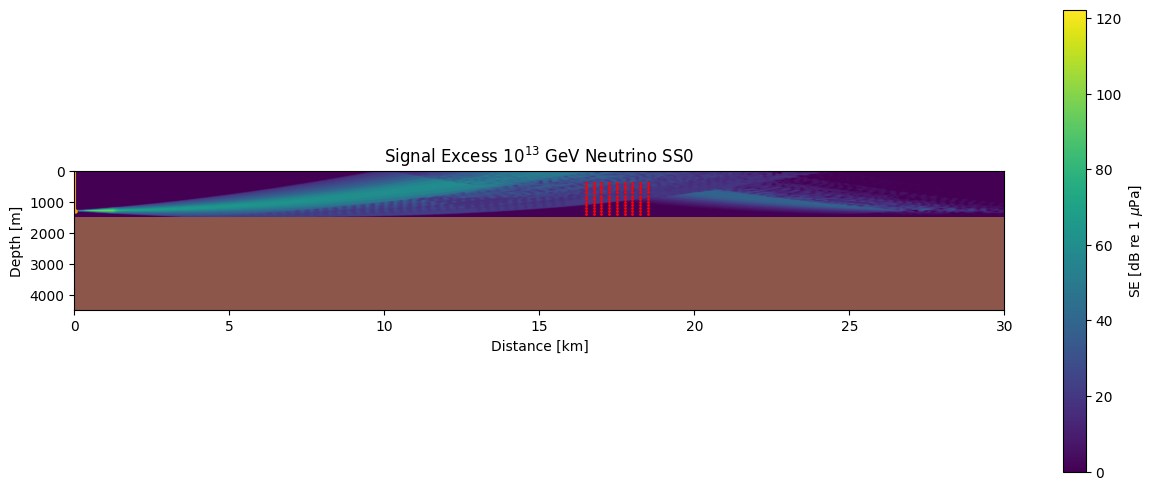

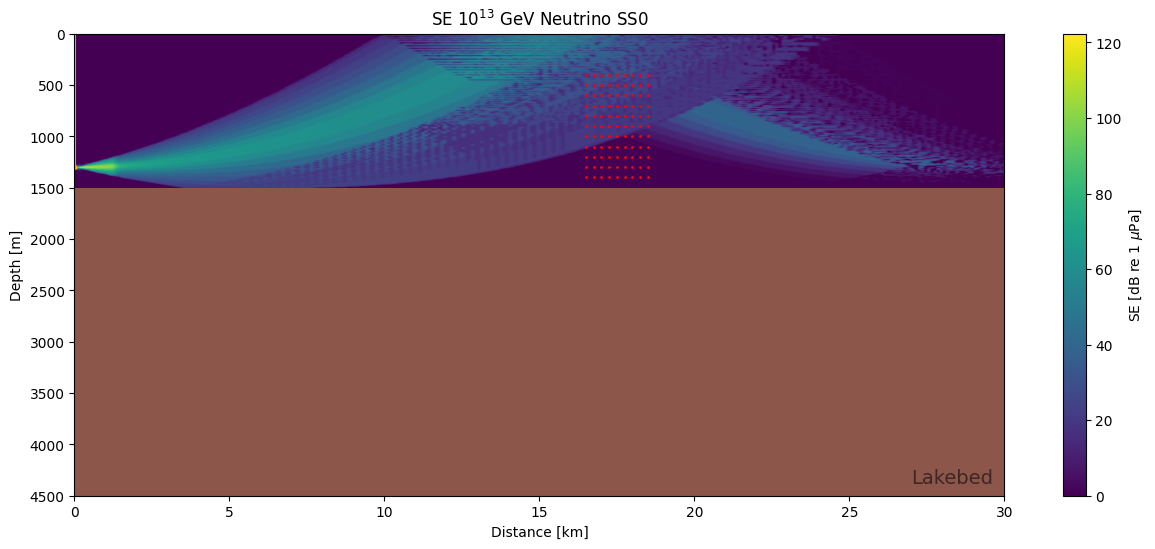

In [48]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np


x = [10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
     10250, 10250, 10250, 10250, 10250, 10250, 10250, 10250, 10250, 10250, 10250, 
     10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 
     10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 
     11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000,
     11250, 11250, 11250, 11250, 11250, 11250, 11250, 11250, 11250, 11250, 11250, 
     11500, 11500, 11500, 11500, 11500, 11500, 11500, 11500, 11500, 11500, 11500, 
     11750, 11750, 11750, 11750, 11750, 11750, 11750, 11750, 11750, 11750, 11750, 
     12000, 12000, 12000, 12000, 12000, 12000, 12000, 12000, 12000, 12000, 12000]
y = [1400, 1300, 1200, 1100, 1000, 900, 800, 700, 600, 500, 400, 
     1400, 1300, 1200, 1100, 1000, 900, 800, 700, 600, 500, 400, 
     1400, 1300, 1200, 1100, 1000, 900, 800, 700, 600, 500, 400, 
     1400, 1300, 1200, 1100, 1000, 900, 800, 700, 600, 500, 400, 
     1400, 1300, 1200, 1100, 1000, 900, 800, 700, 600, 500, 400, 
     1400, 1300, 1200, 1100, 1000, 900, 800, 700, 600, 500, 400, 
     1400, 1300, 1200, 1100, 1000, 900, 800, 700, 600, 500, 400, 
     1400, 1300, 1200, 1100, 1000, 900, 800, 700, 600, 500, 400, 
     1400, 1300, 1200, 1100, 1000, 900, 800, 700, 600, 500, 400]

x = [i + 6500 for i in x]

print(np.max(final_TL))
plt.figure(figsize=(15, 6))
im = plt.imshow(final_TL.T, origin='lower', interpolation='gaussian', extent=[dis[0], dis[-1], el[0], el[-1]], aspect='auto')
cbar = plt.colorbar(im, label='SE [dB re 1 $\mu$Pa]')
plt.clim(vmin=0, vmax=np.max(final_TL))
plt.scatter(x, y, color = 'red', s=1)
plt.scatter(4, 1300, color = 'orange', s=5)
plt.axvline(4, (1 - (1300/4500)), 1.5, color='orange')
plt.xlabel('Distance [km]')
plt.ylabel('Depth [m]')
plt.ylim(0, 4500)
plt.gca().invert_yaxis()
plt.xticks([0, 5000, 10000, 15000, 20000, 25000, 30000], ['0', '5', '10', '15', '20', '25', '30'])
plt.title(f'Signal Excess $10^{{13}}$ GeV Neutrino SS0')
plt.gca().set_facecolor('tab:brown')
plt.savefig('SE 1e13 real Tanganyika SS6.png')

# Set aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

# Create the plot
plt.figure(figsize=(15, 6))
plt.imshow(final_TL.T, origin='lower', interpolation='gaussian', extent=[dis[0], dis[-1], el[0], el[-1]], aspect='auto')
plt.colorbar(label='SE [dB re 1 $\mu$Pa]')
plt.clim(vmin=0, vmax=np.max(final_TL))
plt.scatter(x, y, color = 'red', s=1)
plt.scatter(4, 1300, color = 'orange', s=5)
plt.axvline(4, (1 - (1300/4500)), 1.5, color='orange')
plt.xlabel('Distance [km]')
plt.ylabel('Depth [m]')
plt.ylim(0, 4500)
plt.gca().invert_yaxis()
plt.xticks([0, 5000, 10000, 15000, 20000, 25000, 30000], ['0', '5', '10', '15', '20', '25', '30'])
plt.title(f'SE $10^{{13}}$ GeV Neutrino SS0')
plt.gca().set_facecolor('tab:brown')
plt.text(0.9, 0.06, 'Lakebed', transform=plt.gca().transAxes, fontsize=14, color='#3E2723',
         verticalalignment='top', bbox=dict(facecolor='sienna', alpha=0.0, edgecolor='None'))
plt.savefig('SE 1e15 Tanganyika SS0.png')


plt.show()

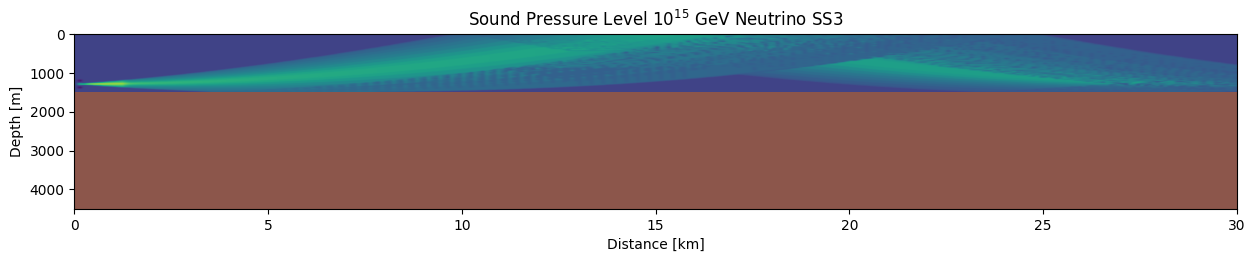

In [41]:
plt.figure(figsize=(15, 6))
im = plt.imshow(final_TL.T, origin='lower', interpolation='gaussian', extent=[dis[0], dis[-1], el[0], el[-1]], aspect='auto')
#cbar = plt.colorbar(im, label='SPL [dB re 1 $\mu$Pa]')
#plt.clim(vmin=noise1[2], vmax=dB_energies[n])
plt.xlabel('Distance [km]')
plt.ylabel('Depth [m]')
plt.ylim(0, 4500)
plt.gca().invert_yaxis()
plt.xticks([0, 5000, 10000, 15000, 20000, 25000, 30000], ['0', '5', '10', '15', '20', '25', '30'])
plt.title(f'Sound Pressure Level $10^{{15}}$ GeV Neutrino SS3')
plt.gca().set_facecolor('tab:brown')



plt.savefig('test.png')

# Set aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

plt.show()
